This module draws heavily from and modifies [Introduction to Pandas](https://github.com/fonnesbeck/statistical-analysis-python-tutorial) by Chris Fonnesbeck, which is licensed under the [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

# Pandas

In [194]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
import pandas as pd
import numpy as np
from IPython.display import display

## Data structures

In [195]:
# Series, indexes
concs = pd.Series([1.1, 2.3, 1.2, 3.5],)
concs.values
concs.index

# Explicit indices
concs = pd.Series([1.1, 2.3, 1.2, 3.5],
                  index = ["CO2", "CH4", "NO2", "O3"])

# Accessing elements of series
concs.CO2 # attribute
concs['CH4'] # key
["O" in formula for formula in concs.index] # looping
concs[0] # positional indexing

# Naming the indices, the values
concs.name = "concentrations (ppb)"
concs.index.name = "compound"

# Numpy-like behavior
concs[0:2]
concs + concs
np.log(concs)
concs[concs > 2]

# Are these the same?  Think about how to ask this.
slice1 = concs["CO2":"NO2"]
slice2 = concs[0:2]
# Inclusive endpoints when slicing using indices

# Construction using dictionaries, Note sorting
concs_dict = {"CO2": 1.1, "CH4": 2.3, 
              "NO2": 1.2, "O3": 3.5}
concs = pd.Series(concs_dict)

# Specifying indices, NaN, alignment of dissimilar series
concs2 = pd.Series(concs_dict, index=["CO2", "CH4", "NO2", "H2O"])
concs2.isnull()
concs + concs2

CH4    4.6
CO2    2.2
H2O    NaN
NO2    2.4
O3     NaN
dtype: float64

In [196]:
# DataFrames - Tabular data structures
atmo = pd.DataFrame({"conc": [1.1, 2.3, 1.2, 3.5],
                     "weight":[44, 16, 46, 48],
                     "formula":["CO2", "CH4", "NO2", "O3"]})

# Indexes, columns
atmo.index # like row labels
atmo.columns

# accessing columns by key, attribute
atmo.weight
atmo['formula']
# diff from series, where index access via attribute/key

# Accessing rows, why are these two things different?
atmo.ix[0]
atmo.ix[0:1]
# Hint, use the type function

atmo.T
atmo.index = atmo.formula

## Real data

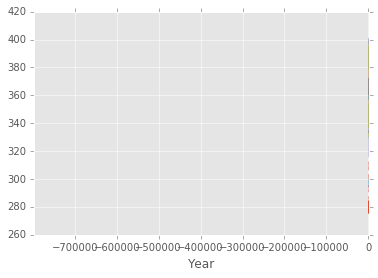

In [197]:
co2 = pd.read_csv("../data/atmo_CO2.csv")
co2 = pd.read_csv("../data/atmo_CO2.csv", index_col = "Year")

co2 = co2.drop("StanfordCalifornia", axis = 1)
# or
co2 = co2.dropna(axis = 1, how = "all")

#co2.info()
#co2.describe()

#co2.plot(legend = False)
co2.ix[:, co2.columns != "EPICADome"].plot(legend = False)

## Concatenation

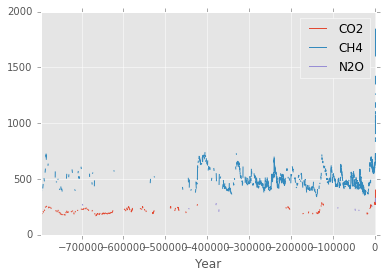

In [198]:
co2.mean(axis=1)
ch4 = pd.read_csv("../data/atmo_CH4.csv", index_col = "Year")
n2o = pd.read_csv("../data/atmo_N2O.csv", index_col = "Year")

# Concat
summary = pd.concat([chem.mean(axis=1) for chem in [co2, ch4, n2o]], axis=1)
summary.columns = ["CO2", "CH4", "N2O"]
summary.plot()

## Fill in missing data

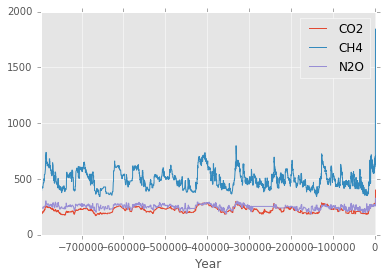

In [199]:
summary = summary.fillna(method = "bfill")
summary.plot()

## Writing to file

In [200]:
summary.to_csv("atmo_summary.csv")

## Statistics and correlations

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f2475c0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1174eb7f0>], dtype=object)

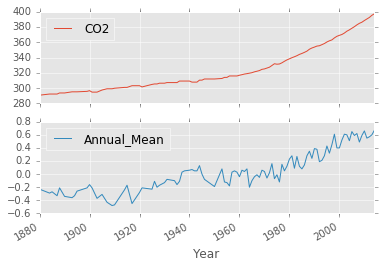

In [201]:
temp = pd.read_csv("../data/temperature.csv", index_col = "Year")

temp.index = temp.index.astype(float)
temp_comp = pd.concat((summary, temp["Annual_Mean"]), axis = 1)
temp_comp = temp_comp.dropna()
temp_comp[["CO2", "Annual_Mean"]].plot(subplots=True)

In [202]:
temp_comp.corr()

,CO2,CH4,N2O,Annual_Mean
CO2,1.000000,0.962322,0.997721,0.936630
CH4,0.962322,1.000000,0.970145,0.907395
N2O,0.997721,0.970145,1.000000,0.936295
Annual_Mean,0.936630,0.907395,0.936295,1.000000


In [203]:
temp_comp.cov()

,CO2,CH4,N2O,Annual_Mean
CO2,889.286382,9798.345388,427.067021,8.440250
CH4,9798.345388,116579.660104,4754.600522,93.621222
N2O,427.067021,4754.600522,206.030864,4.061114
Annual_Mean,8.440250,93.621222,4.061114,0.091313


In [204]:
model = pd.ols(y = temp_comp["Annual_Mean"], x = temp_comp["CO2"])
print(model.summary)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         103
Number of Degrees of Freedom:   2

R-squared:         0.8773
Adj R-squared:     0.8761

Rmse:              0.1064

F-stat (1, 101):   721.9861, p-value:     0.0000

Degrees of Freedom: model 1, resid 101

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0095     0.0004      26.87     0.0000     0.0088     0.0102
     intercept    -3.0601     0.1167     -26.22     0.0000    -3.2888    -2.8314
---------------------------------End of Summary---------------------------------



/Users/josephmontoya/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [205]:
import statsmodels.api as sm

xdata = temp_comp.CO2
xdata = sm.add_constant(xdata)
#xdata = sm.add_constant(xdata)
ydata = temp_comp.Annual_Mean
model = sm.OLS(ydata, xdata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Annual_Mean   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     722.0
Date:                Mon, 27 Jun 2016   Prob (F-statistic):           8.27e-48
Time:                        11:32:45   Log-Likelihood:                 85.653
No. Observations:                 103   AIC:                            -167.3
Df Residuals:                     101   BIC:                            -162.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.0601      0.117    -26.222      0.000        -3.292    -2.829
CO2            0.0095      0.000     26.870      0.000         0.009     0.010
==============================================================================
Omnibus:                        0.451   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.446
Skew:                          -0.152   Prob(JB):                        0.800
Kurtosis:                       2.895   Cond. No.                     3.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

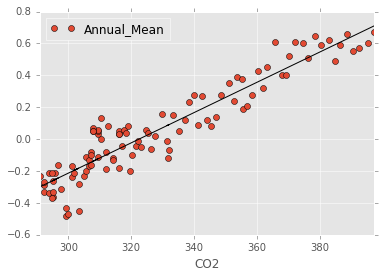

In [206]:
temp_comp.plot(y = "Annual_Mean", x = "CO2", linestyle = '', marker = 'o')
plt.plot(xdata, model.predict(xdata), 'k-')

## Exercise: Do a OLS regression on a 3-parameter quadratic model

                            OLS Regression Results                            
Dep. Variable:            Annual_Mean   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     361.3
Date:                Mon, 27 Jun 2016   Prob (F-statistic):           1.73e-46
Time:                        09:45:42   Log-Likelihood:                 86.147
No. Observations:                 103   AIC:                            -166.3
Df Residuals:                     100   BIC:                            -158.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -4.5277      1.499     -3.021      0.0

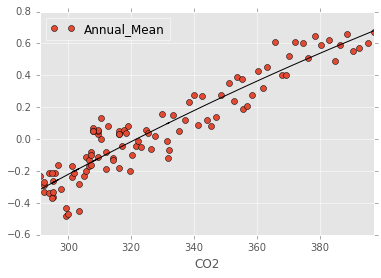

In [191]:
xdata = temp_comp.CO2
xdata = sm.add_constant(xdata)
co2_squared = xdata.CO2**2
co2_squared.name = "CO2^2"
xdata = pd.concat((xdata, co2_squared), axis = 1)
fit = sm.OLS(temp_comp.Annual_Mean, xdata).fit()
print(fit.summary())
temp_comp.plot(y = "Annual_Mean", x = "CO2", linestyle = '', marker = 'o')
plt.plot(xdata, fit.predict(xdata), 'k-')